In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

<hr>
<br>
<b>Paso 2. Cargamos los datos: </b>

In [ ]:
df = pd.read_csv('/content/titanic.csv')

<hr>
<br>
<b>Paso 3. Conociendo los datos: </b>

In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<hr>
<br>
<b>Paso 4. Identificar los tipos de datos: </b>

In [ ]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


<hr>
<br>
<b>Paso 5. Identificar datos faltantes: </b>

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0


<hr>
<br>
<b>Paso 6. Identificar datos atípicos: </b>

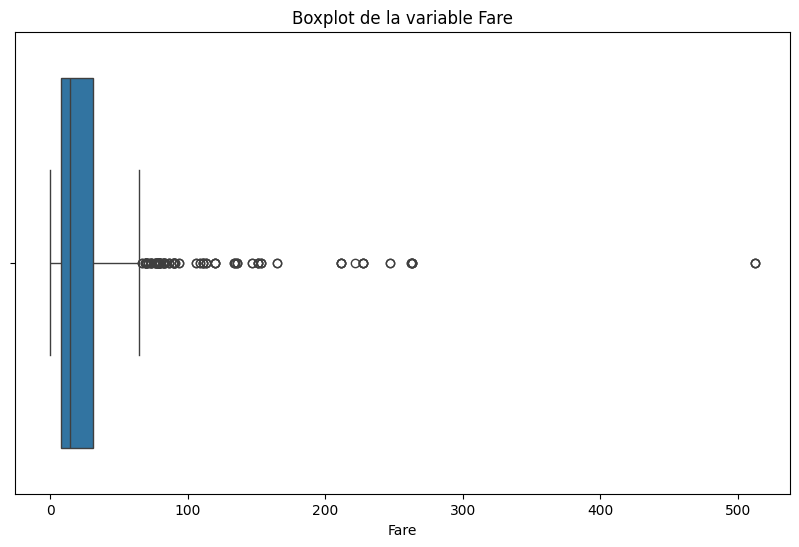

In [ ]:
# Gráfico 1: Boxplot para identificar datos atípicos en la variable 'Fare'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Fare'])
plt.title('Boxplot de la variable Fare')
plt.xlabel('Fare')
plt.show()

<ipython-input-62-4a83c6bc704f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=df, palette='viridis')


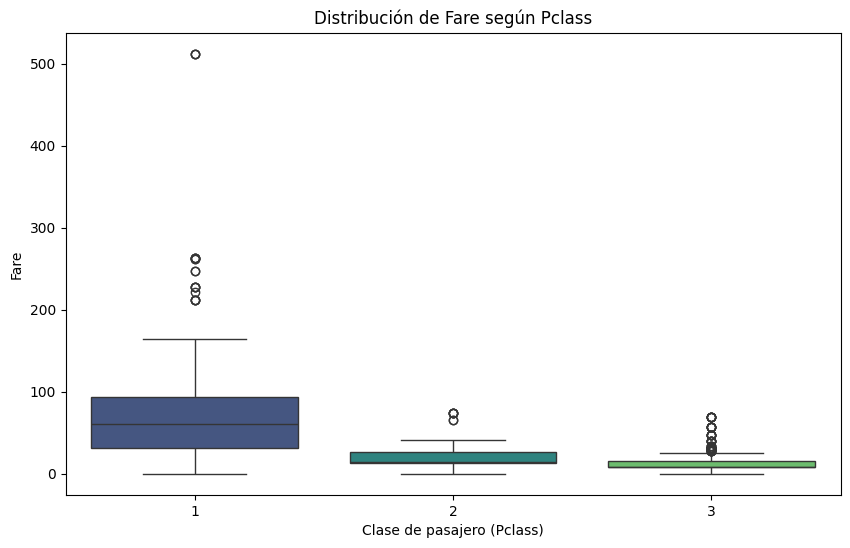

In [ ]:
# Gráfico 2: Relación entre la variable categórica 'Pclass' y la variable numérica 'Fare'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='viridis')
plt.title('Distribución de Fare según Pclass')
plt.xlabel('Clase de pasajero (Pclass)')
plt.ylabel('Fare')
plt.show()

<hr>
<br>
<b>Paso 7. Calcular las estadísticas: </b>

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


<hr>
<br>
<b>Paso 8. Análisis de tendencia central, posición y dispersión: </b>

In [ ]:
# Seleccionar variables numéricas
numerical_vars = ['Age', 'Fare']

# Análisis estadístico descriptivo
for col in numerical_vars:
    print(f"Análisis para la variable: {col}")
    print(f"Media: {df[col].mean():.2f}")
    print(f"Mediana: {df[col].median():.2f}")
    print(f"Moda: {df[col].mode().values[0]:.2f}")
    print(f"Varianza: {df[col].var():.2f}")
    print(f"Desviación estándar: {df[col].std():.2f}")
    print(f"Coeficiente de asimetría (Skewness): {df[col].skew():.2f}")
    print(f"Rango: {df[col].max() - df[col].min():.2f}")
    print("-" * 40)

Análisis para la variable: Age
Media: 29.70
Mediana: 28.00
Moda: 24.00
Varianza: 211.02
Desviación estándar: 14.53
Coeficiente de asimetría (Skewness): 0.39
Rango: 79.58
----------------------------------------
Análisis para la variable: Fare
Media: 32.20
Mediana: 14.45
Moda: 8.05
Varianza: 2469.44
Desviación estándar: 49.69
Coeficiente de asimetría (Skewness): 4.79
Rango: 512.33
----------------------------------------


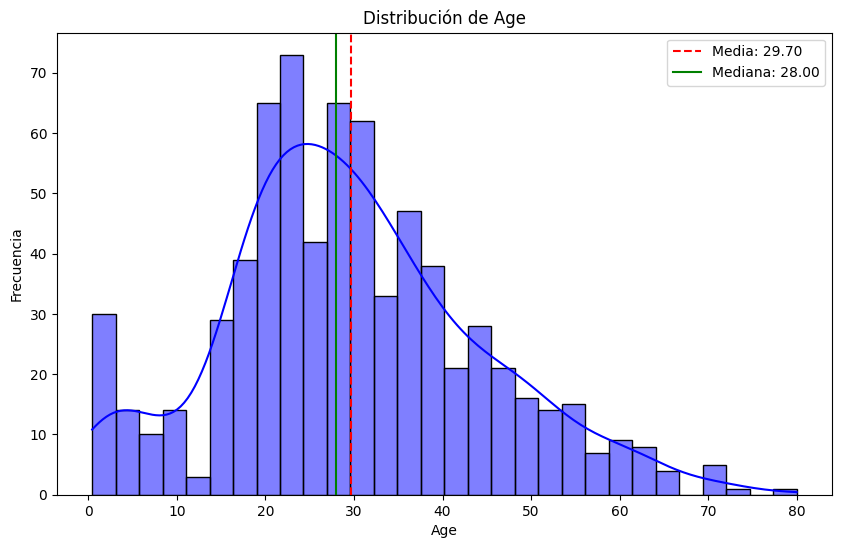

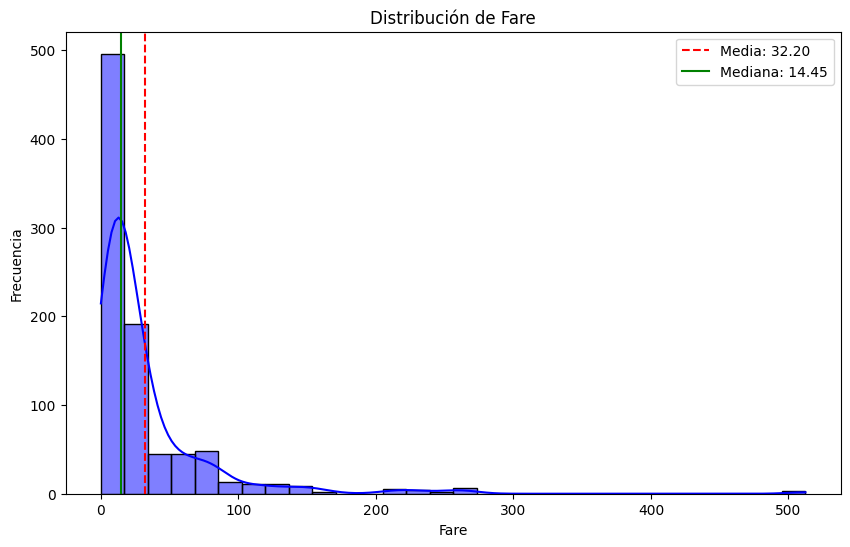

In [ ]:
# Visualización de la tendencia central y dispersión: Histogramas
for col in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribución de {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frecuencia')
    plt.axvline(df[col].mean(), color='red', linestyle='--', label=f"Media: {df[col].mean():.2f}")
    plt.axvline(df[col].median(), color='green', linestyle='-', label=f"Mediana: {df[col].median():.2f}")
    plt.legend()
    plt.show()

<hr>
<br>
<b>Paso 9. Contando datos duplicados:</b>

In [ ]:
df.duplicated().sum()

0

<hr>
<br>
<b>Paso 10. Exploración y visualización de los datos:</b>

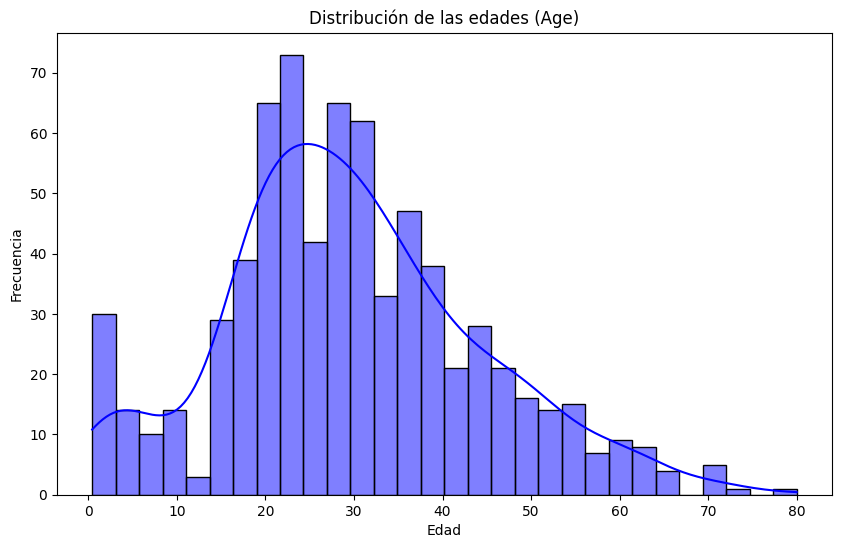

In [ ]:
# Pregunta 1: ¿Cuál es la distribución de las edades?
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30, color='blue')
plt.title('Distribución de las edades (Age)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

<hr>
<br>
<b>Paso 11. Combinando variables</b>

<ipython-input-69-2d063a5f7b6e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=df, palette='viridis')


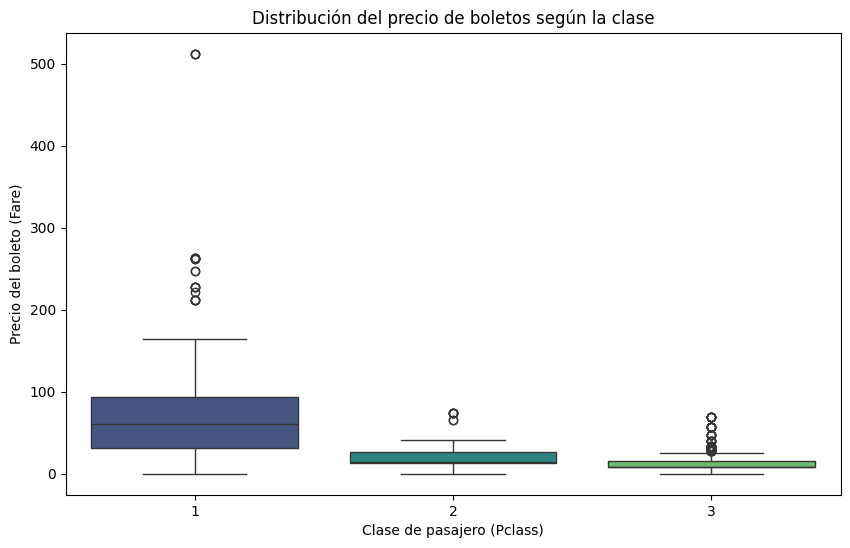

In [ ]:
# Pregunta 2: ¿Existen diferencias en los precios de boletos por clase?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='viridis')
plt.title('Distribución del precio de boletos según la clase')
plt.xlabel('Clase de pasajero (Pclass)')
plt.ylabel('Precio del boleto (Fare)')
plt.show()

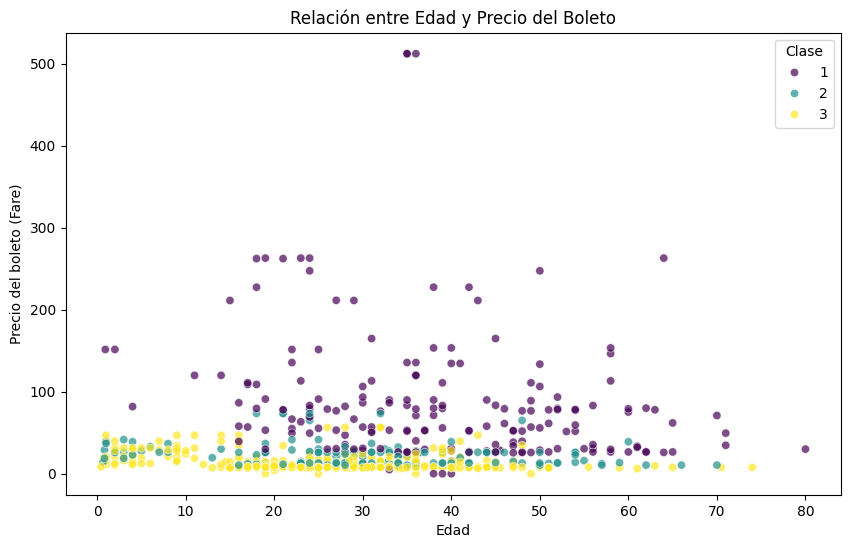

In [ ]:
# Pregunta 3: Relación entre edad y precio del boleto
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df, hue='Pclass', palette='viridis', alpha=0.7)
plt.title('Relación entre Edad y Precio del Boleto')
plt.xlabel('Edad')
plt.ylabel('Precio del boleto (Fare)')
plt.legend(title='Clase')
plt.show()

<hr>
<br>
<b>Paso 12. Tipos de datos: </b>

In [ ]:
# Lista de columnas que deberían ser enteras
integer_columns = ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch']

# Convertir las columnas a enteros
for col in integer_columns:
    df[col] = df[col].astype('int')

# Verificar los tipos de datos
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


<hr>
<br>
<b>Paso 13. Datos inconsistentes: </b>

In [ ]:
# 1. Edad no puede ser negativa ni mayor a 100
df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]

# 2. Clase (Pclass) debe ser 1, 2 o 3
df = df[df['Pclass'].isin([1, 2, 3])]

# 3. Sexo (Sex) debe ser "male" o "female"
df = df[df['Sex'].isin(['male', 'female'])]

# 4. Valores faltantes en columnas críticas (ej., Fare y Embarked)
df = df.dropna(subset=['Fare', 'Embarked'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


<hr>
<br>
<b>Paso 14. Datos atípicos:</b>

<ipython-input-73-45196e10ecf6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='pastel')


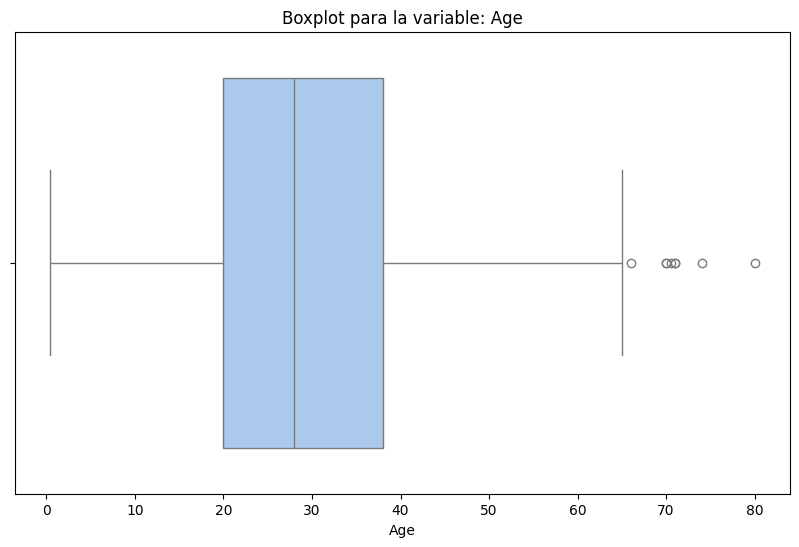

<ipython-input-73-45196e10ecf6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='pastel')


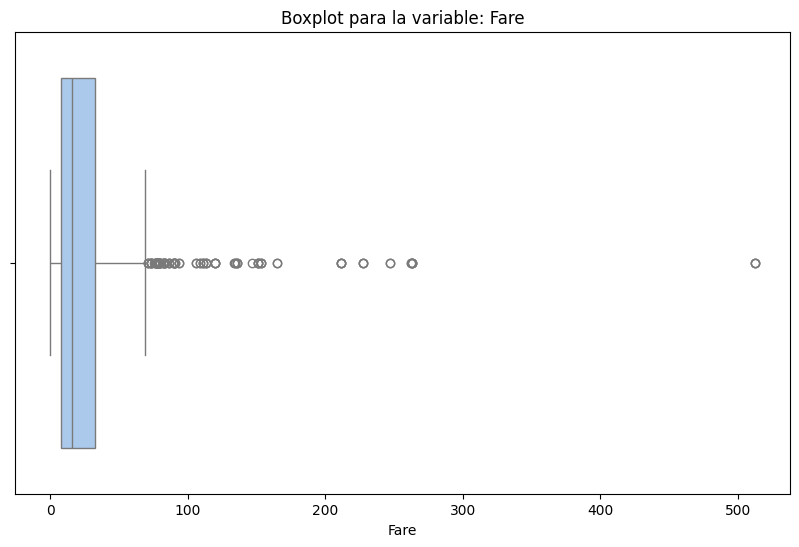

In [ ]:
# Variables numéricas
numerical_vars = ['Age', 'Fare']

# Visualización con boxplots
for col in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col], palette='pastel')
    plt.title(f"Boxplot para la variable: {col.capitalize()}")
    plt.xlabel(col.capitalize())
    plt.show()

<hr>
<br>
<b>Paso 15. Datos redundantes: </b>

Matriz de correlación:
            Age     SibSp     Parch      Fare
Age    1.000000 -0.307351 -0.187896  0.093143
SibSp -0.307351  1.000000  0.383338  0.139860
Parch -0.187896  0.383338  1.000000  0.206624
Fare   0.093143  0.139860  0.206624  1.000000


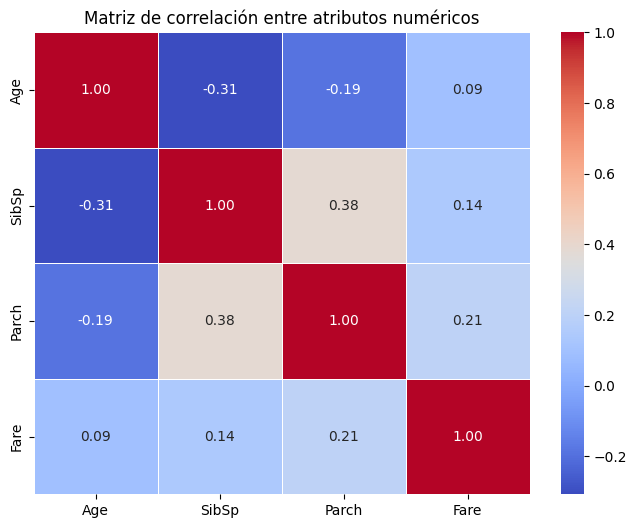

In [ ]:
# Seleccionar atributos numéricos
numerical_vars = ['Age', 'SibSp', 'Parch', 'Fare']

# Calcular la matriz de correlación
correlation_matrix = df[numerical_vars].corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)

# Visualizar con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación entre atributos numéricos")
plt.show()

<hr>
<br>
<b>Paso 16. Datos duplicados:</b>

In [ ]:
# Identificar duplicados en todo el dataset
duplicados_totales = df.duplicated().sum()
print(f'Número total de registros duplicados: {duplicados_totales}')

# Mostrar registros duplicados (si existen)
if duplicados_totales > 0:
    print('\nRegistros duplicados:')
    print(df[df.duplicated()])

# Eliminar duplicados
df = df.drop_duplicates()

print('\nDataset después de eliminar duplicados:')
print(f'Total de registros: {len(df)}')

Número total de registros duplicados: 0

Dataset después de eliminar duplicados:
Total de registros: 712


<hr>
<br>
<b>Paso 17. Transformaciones a los datos: </b>

In [ ]:
# Revisar valores nulos en el dataset
print(df.isnull().sum())

# Llenar los valores nulos con la media (o la mediana) para variables numéricas
df['Age'] = df['Age'].fillna(df['Age'].median())

# Para las variables categóricas, podemos llenarlas con el valor más frecuente (mode)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         0
dtype: int64


In [ ]:
# Crear una nueva variable 'FamilySize' como la combinación de SibSp y Parch
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 para incluir al propio pasajero

In [ ]:
# Codificación de variables categóricas con One-Hot Encoding
sex = df.Sex
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

<hr>
<br>
<b>Paso 18. Numerización: </b>

In [ ]:
# Seleccionamos las variables numéricas que vamos a normalizar
variables_numericas = ['Age', 'SibSp', 'Parch', 'Fare']

# Crear el escalador
scaler = MinMaxScaler()

# Normalizamos las variables seleccionadas
df[variables_numericas] = scaler.fit_transform(df[variables_numericas])

# Verificar las primeras filas del DataFrame para confirmar la normalización
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name       Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  0.271174    0.2    0.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.472229    0.2    0.0   
2                             Heikkinen, Miss. Laina  0.321438    0.0    0.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.434531    0.2    0.0   
4                           Allen, Mr. William Henry  0.434531    0.0    0.0   

             Ticket      Fare Cabin  FamilySize  Sex_male  Embarked_Q  \
0         A/5 21171  0.014151   NaN           2      True       False   
1          PC 17599  0.139136   C85           2     False       False   
2  STON/O2. 3101282  0.015469   NaN           1     False       False   
3         

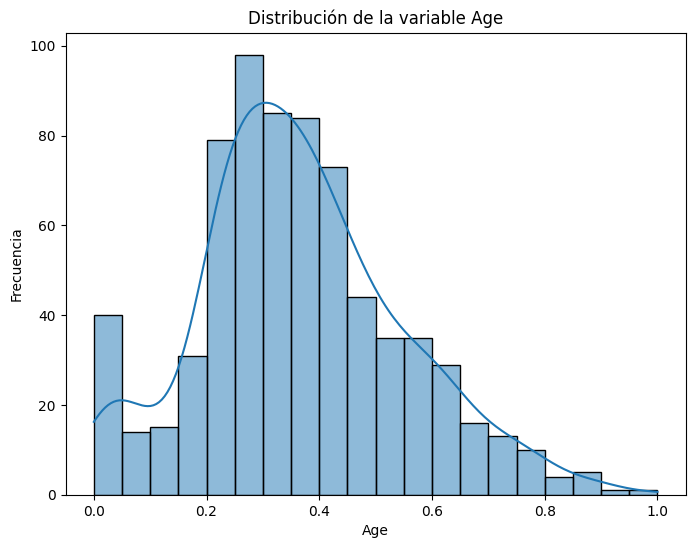

In [ ]:
# Visualizar la distribución de la variable 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribución de la variable Age')
plt.xlabel('Age')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Definir los límites de los intervalos para la variable 'Age'
bins = [0, 12, 18, 35, 50, 100]  # Ejemplo de categorías: Niño, Adolescente, Adulto, etc.
labels = ['Niño', 'Adolescente', 'Adulto Joven', 'Adulto', 'Senior']

# Aplicar la discretización utilizando pd.cut()
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Ver los primeros registros para verificar la discretización
print(df[['Age', 'AgeGroup']].head())

        Age AgeGroup
0  0.271174     Niño
1  0.472229     Niño
2  0.321438     Niño
3  0.434531     Niño
4  0.434531     Niño


<hr>
<br>
<b>Paso 19. Numerización: </b>

In [ ]:
df['Sex'] = sex

# Numerizar la variable 'Sex'
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

# Verificar la numerización
print(df[['Sex']].head())

   Sex
0    1
1    0
2    0
3    0
4    1


<hr>
<br>
<b>Paso 20. Técnicas de muestreo: </b>

In [ ]:
# Seleccionamos el 30% del conjunto de datos de manera aleatoria
df_sample = df.sample(frac=0.3, random_state=42)

# Verificamos las primeras filas de la muestra
print(df_sample.head())


     PassengerId  Survived  Pclass                            Name       Age  \
641          642         1       1            Sagesser, Mlle. Emma  0.296306   
496          497         1       1  Eustis, Miss. Elizabeth Mussey  0.673285   
262          263         0       1               Taussig, Mr. Emil  0.648153   
311          312         1       1      Ryerson, Miss. Emily Borie  0.220910   
551          552         0       2     Sharp, Mr. Percival James R  0.334004   

     SibSp     Parch    Ticket      Fare            Cabin  FamilySize  \
641    0.0  0.000000  PC 17477  0.135265              B35           1   
496    0.2  0.000000     36947  0.152766              D20           2   
262    0.2  0.166667    110413  0.155466              E67           3   
311    0.4  0.333333  PC 17608  0.512122  B57 B59 B63 B66           5   
551    0.0  0.000000    244358  0.050749              NaN           1   

     Sex_male  Embarked_Q  Embarked_S AgeGroup  Sex  
641     False       False 